####**This Noteboob is being Prepared by Yaminee Swami || Cohort Sydney**

# **Project Name    -  Airline Passenger Referral Prediction**



# **Project Summary -**

Customer referral is a crucial aspect of business growth and success, and the airline industry is no exception. Satisfied passengers who have had positive experiences with an airline are more likely to refer the airline to their friends, family, and colleagues. Identifying these potential advocates can help airlines improve customer satisfaction and loyalty and attract new customers.

In this project, we will use machine learning algorithms to predict whether a passenger will refer an airline to others. We will use a dataset that includes past passengers and their referral behavior, as well as various features such as age, gender, flight class, and route information.

Our first step will be to perform exploratory data analysis to gain insights into the data and identify any patterns or correlations. We will then preprocess the data by handling missing values, encoding categorical variables, and scaling numeric features.

We will then apply several machine learning algorithms, including logistic regression, random forest, and support vector machines, to predict the likelihood of a passenger becoming a referral. We will also perform feature engineering and selection to improve the performance of our models.

Finally, we will evaluate our models using metrics such as accuracy, precision, recall, and F1 score. We will also use techniques such as cross-validation and grid search to tune our hyperparameters and ensure our models generalize well to new data.

# **GitHub Link -**

# **Problem Statement**


The main objective of this project is to predict whether passengers will refer the airlines to their friends/family or not. The data includes airline reviews from 2016 to 2019 for popular airlines around the world in the form of multiple choice and free text questions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm
import warnings
warnings.filterwarnings('ignore')


# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB


# Importing  metrics for evaluation for our models
import math
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
a = list(df.shape)
print("There are {} rows and {} columns in the dataset.".format(a[0],a[1]))

There are 131895 rows and 17 columns in the dataset.


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("There are",df.duplicated().sum(),"duplicate values in the dataset.")

There are 70711 duplicate values in the dataset.


In [ ]:
new_df = df.copy()

In [ ]:
new_df.drop_duplicates(inplace = True)

In [ ]:
new_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
new_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

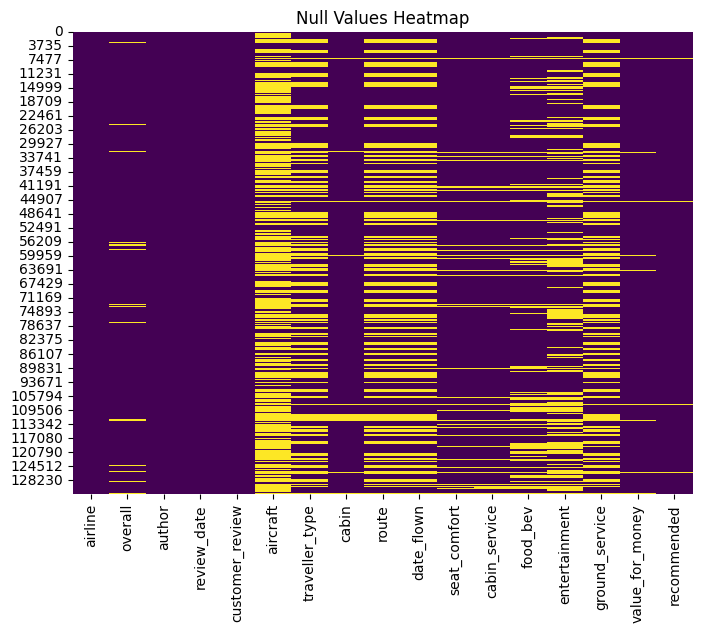

In [ ]:
# Visualizing the missing values

# Through Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values Heatmap')
plt.show()

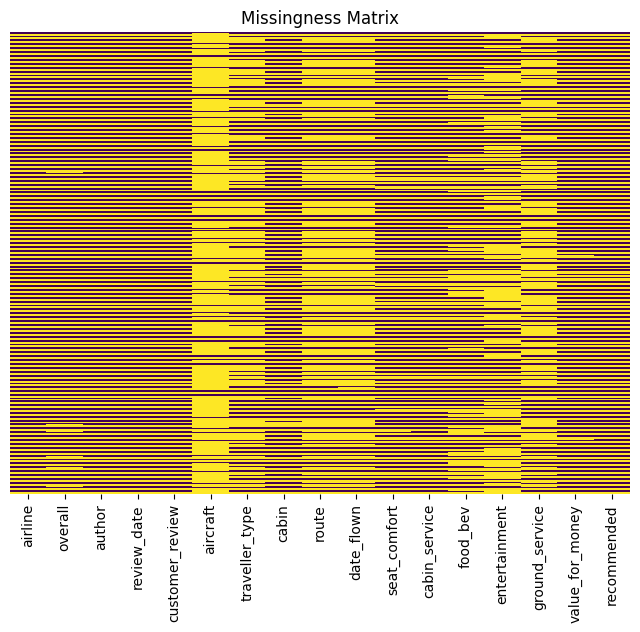

In [ ]:
# Through Missingness matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missingness Matrix')
plt.show()


### What did you know about your dataset?

* The dataset contains information about the airline and travel experience. It has fields like aircraft, cabin, food_bev, entertainment, ground_service, overall rating etc which are feedback parameters requested by customers which in turn help in predicting whether a customer refers the airline to his friends/family or not.
* The dataset has 131895 rows and 17 columns.
* There are 70711 duplicate values in the dataset.
* There are multiple null values in several columns which need to be imputed/handled.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
new_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
new_df.describe().T


,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


### Variables Description

* **airline**: Name of the airline.

* **overall**: Overall point is given to the trip between 1 to 10.

* **author**: Author of the trip

* **review date**: Date of the Review

* **customer review**:Review of the customers in free text format

* **aircraft**: Type of the aircraft

* **traveller type**: Type of traveler (e.g. business, leisure)

* **cabin**: Cabin at the flight date flown: Flight date

* **seat comfort**: Rated between 1-5

* **cabin service**: Rated between 1-5

* **foodbev**: Rated between 1-5

* **entertainment**: Rated between 1-5

* **ground service**: Rated between 1-5

* **value for money**: Rated between 1-5

* **recommended**: Binary, target variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
new_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [ ]:
new_df['recommended'].value_counts()

no     31268
yes    28493
Name: recommended, dtype: int64

In [ ]:
new_df['traveller_type'].unique()

array([nan, 'Business', 'Family Leisure', 'Solo Leisure',
       'Couple Leisure'], dtype=object)

In [ ]:
new_df['cabin'].unique()

array([nan, 'Economy Class', 'Business Class', 'Premium Economy',
       'First Class'], dtype=object)

## 3. ***Data Wrangling***

In [ ]:
#Checking Percentage wise missing values.
def missing_values_per_check(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [ ]:
#Checking Percentage wise missing values.
missing_values_per_check(new_df)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [ ]:
#Showing the unique aircraft names
new_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [ ]:
# applying the 8% rule rule and droping the columns which have null values less than 8%
cols = ['cabin','value_for_money','overall','recommended','customer_review','review_date','author','airline']
airline_df = new_df.dropna(subset=cols, how='all')

airline_df.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [ ]:
#droping the columns from data which are not for our use
airline_df = airline_df.drop(['aircraft','author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [ ]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [ ]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_df,col)

In [ ]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [ ]:
#Looping the null value column
for col in high_null:
  median_imputation(airline_df,col)

In [ ]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [ ]:
# Imputing traveller_type null values by forward fill method
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [ ]:
# Imputing cabin null values by mode value
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

In [ ]:
#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
#Checking the new null value percentage
missing_values_per_check(airline_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [ ]:
airline_df.shape

(59761, 11)

### What all manipulations have you done and insights you found?

* Checking missing values in the dataset percentage wise using the function missing_values_per_check.
* Applying the 8% rule and dropping all rows where null value percentage is less than 8% as it won't affect our data.
* Splitting the numeric column into low_null(columns having lesser null values) and high_null(columns having large number of null values) list.
* Imputing the low_null columns by Q1 quantile values.
* Imputing the high_null columns by median values.
* Imputing traveller_type column by forward fill method.
* Imputing cabin column null values by mode values.
* Labelling recommended column - 1 for 'Yes' , 0 for 'No' .
* After handling all the null/missing values the size of the dataset reduces to 59761 rows and 11 columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Traveller Analysis

Text(0, 0.5, 'No of travellers')

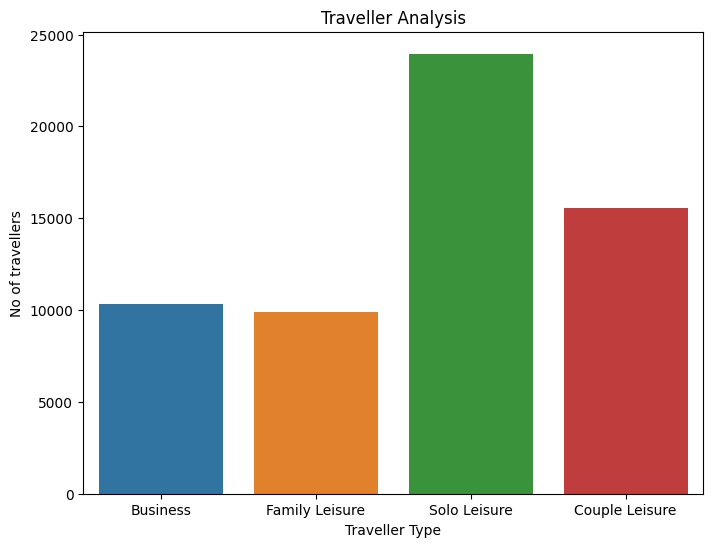

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,6))
sns.countplot(data = airline_df, x= 'traveller_type')
plt.title('Traveller Analysis')
plt.xlabel('Traveller Type')
plt.ylabel('No of travellers')

**From the above chart, we can observe that maximum bookings have been dono by passengers for 'Solo Leisure' followed by 'Couple Leisure' and minimum bookings are for 'Family Leisure'.**

#### Chart - 2 Cabin Class Analysis

Text(0, 0.5, 'No of travellers')

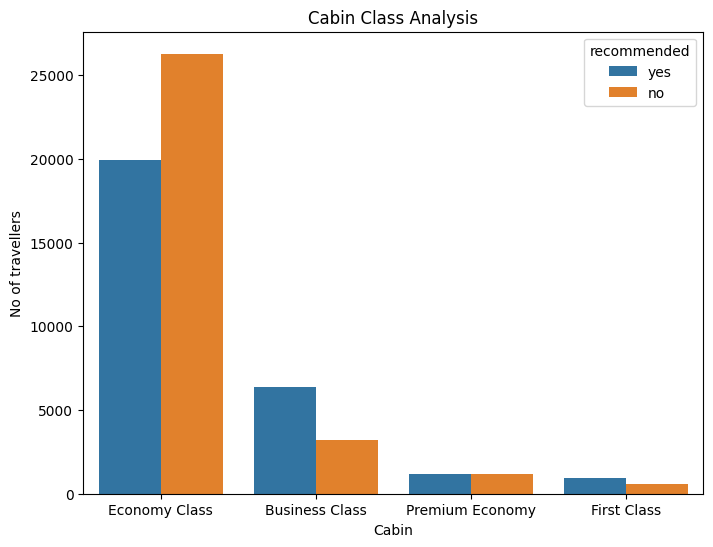

In [ ]:
# Chart - 2 visualization code

#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(data = airline_df,x ='cabin',hue=new_df['recommended'])
plt.title('Cabin Class Analysis')
plt.xlabel('Cabin')
plt.ylabel('No of travellers')

* **From the above chart, we can see maximum referrals have been given by Economy Class travellers which is also the case because Economy class has largest number of bookings. However it is interesting to note that majority of them have not given recommendation.**
* **Business Class travellers are more likely to give recommendations**

#### Chart - 3 Travel Type vs Value for Money

Text(0, 0.5, 'Value for Money')

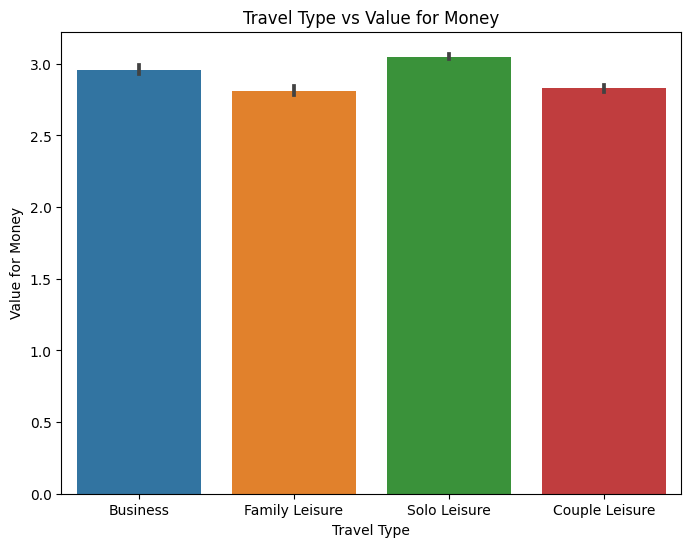

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(8,6))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'])
plt.title('Travel Type vs Value for Money')
plt.xlabel('Travel Type')
plt.ylabel('Value for Money')

**From the above chart, we can see that all types of travellers are equally satisfied with the airline services according to the money asked.**

#### Chart - 4    **Food_bev and Entertainment Ratin Cabin wise**

In [ ]:
# Chart - 4 visualization code
#performing the grouphby method
eda_4 = airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda_4

,cabin,food_bev,entertainment
0,Business Class,3.496142,3.299583
1,Economy Class,2.812577,2.830986
2,First Class,3.360966,3.230418
3,Premium Economy,2.926202,3.033582


Text(0, 0.5, 'Rating')

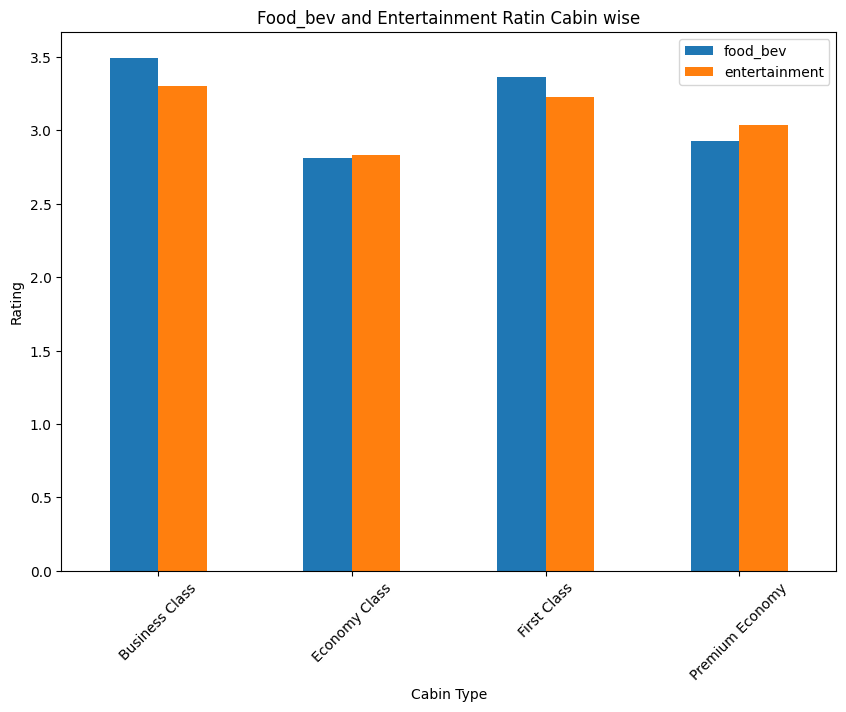

In [ ]:
plt.rcParams['figure.figsize']=(10,7)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")
plt.xticks(rotation=45)
plt.title('Food_bev and Entertainment Ratin Cabin wise')
plt.xlabel('Cabin Type')
plt.ylabel('Rating')

* **In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes. The airlines can work on their food,beverage and entertainment service for Economy class as the rating is ~2.5/10**
* **Business class passengers are more satisfied with the food_bev in comparison to entertainment.**
* **Premium Economy passengers are more satisfied with entertainment than food_bev.**

#### Chart - 5  **Cabin and Cabin Service Rating Analysis**

Text(0, 0.5, 'Cabin Service')

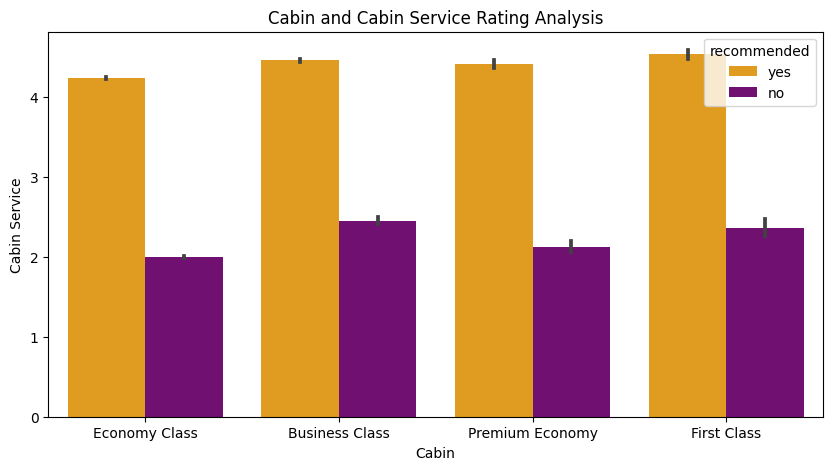

In [ ]:
# Chart - 5 visualization code
#Cabin type and cabin service ratings
plt.figure(figsize=(10,5))
sns.barplot(data = airline_df, x= 'cabin',y = 'cabin_service', hue = new_df['recommended'], palette= ['orange','purple'])
plt.title('Cabin and Cabin Service Rating Analysis')
plt.xlabel('Cabin')
plt.ylabel('Cabin Service')

* **From the above chart we can make out that good rating for cabin service results in likelihood for recommendation.**
* **Passengers from First Class have given maximum recommendations as well as maximum ratings for cabin service**

#### Chart - 6 **Overall Rating Analysis**

Text(0, 0.5, 'Overall Rating')

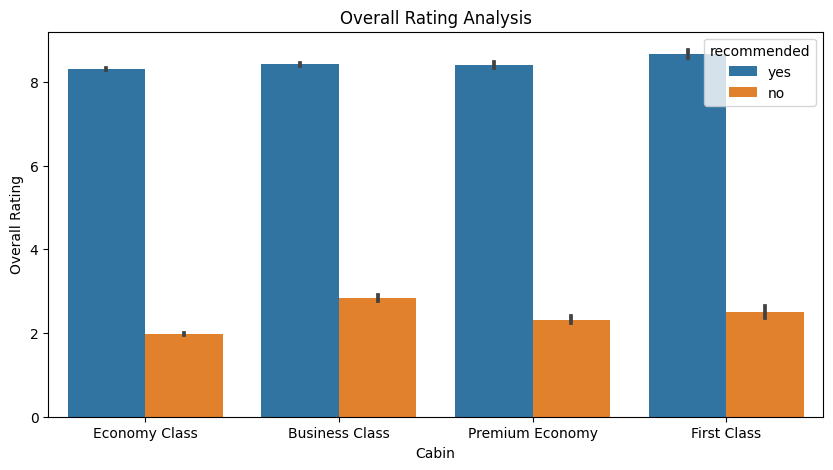

In [ ]:
# Chart - 6 visualization code
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.barplot(data= new_df, x= 'cabin', y = 'overall', hue = new_df['recommended'])
plt.title('Overall Rating Analysis')
plt.xlabel('Cabin')
plt.ylabel('Overall Rating')

**From the above char, we can observe that
* **First Class passengers have given maximum overall rating which is close to 9 which is suggestive of the good services offered in First class cabin**
* **Overall Rating is close to 8 for all cabin types.**

#### Chart - 7  **Overall Rating Traveller Wise**

Text(0, 0.5, 'Overall Rating')

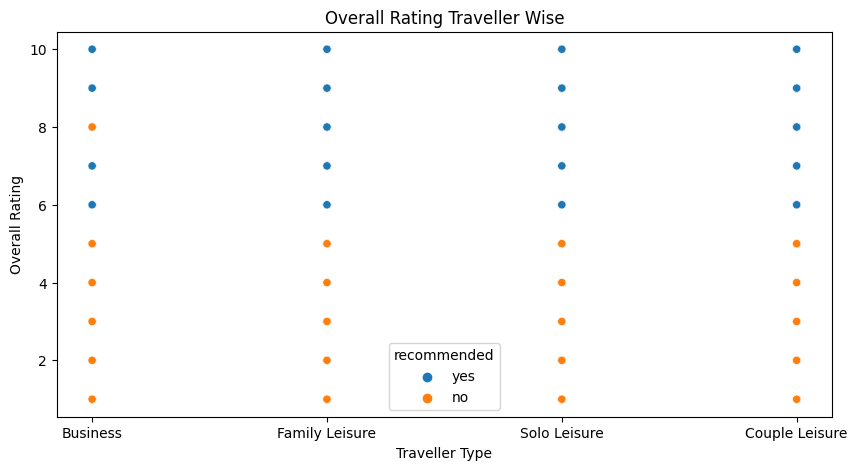

In [ ]:
# Chart - 7 visualization code
#Traveller type and overall service ratings (out of 10 )
plt.figure(figsize=(10,5))
sns.scatterplot(data = new_df,x ='traveller_type', y = 'overall', hue = new_df['recommended'])
plt.title('Overall Rating Traveller Wise')
plt.xlabel('Traveller Type')
plt.ylabel('Overall Rating')

#### Chart - 8

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

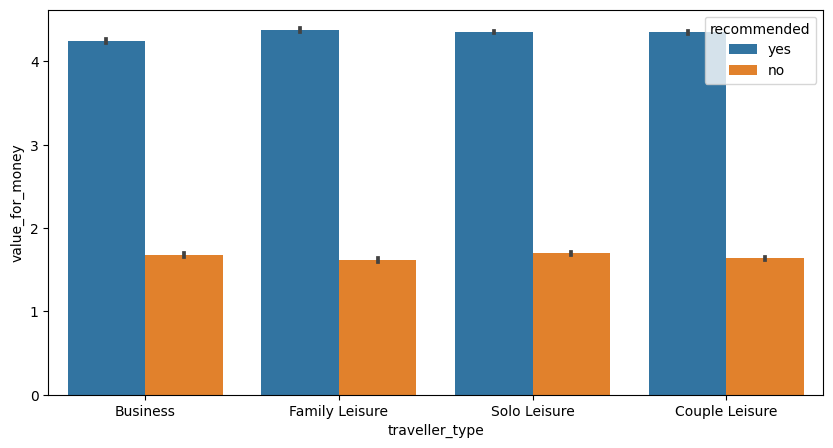

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
sns.barplot(data = airline_df,x = 'traveller_type', y = 'value_for_money', hue = new_df['recommended'])

**From the above chart, we can see that**
* **When the cabin_Service is rated 5, it is highly likely that the reviewer has recommended the airlines to travel irrespective of the type of cabin.**

* **Economy class is the most recommended cabin type, whereas business class is the least recommended one.**

#### Chart - 9   **Top 10 Airlines**

In [ ]:
# Chart - 9 visualization code
# Get the number of trips each airline make.
trip_by_airlines = airline_df['airline'].value_counts()
tba = pd.DataFrame(trip_by_airlines)
tba

,airline
Spirit Airlines,2808
American Airlines,2756
United Airlines,2715
British Airways,2644
Emirates,1716
...,...
QantasLink,102
Adria Airways,83
Air Arabia,80
Tunisair,71


<Figure size 2000x500 with 0 Axes>

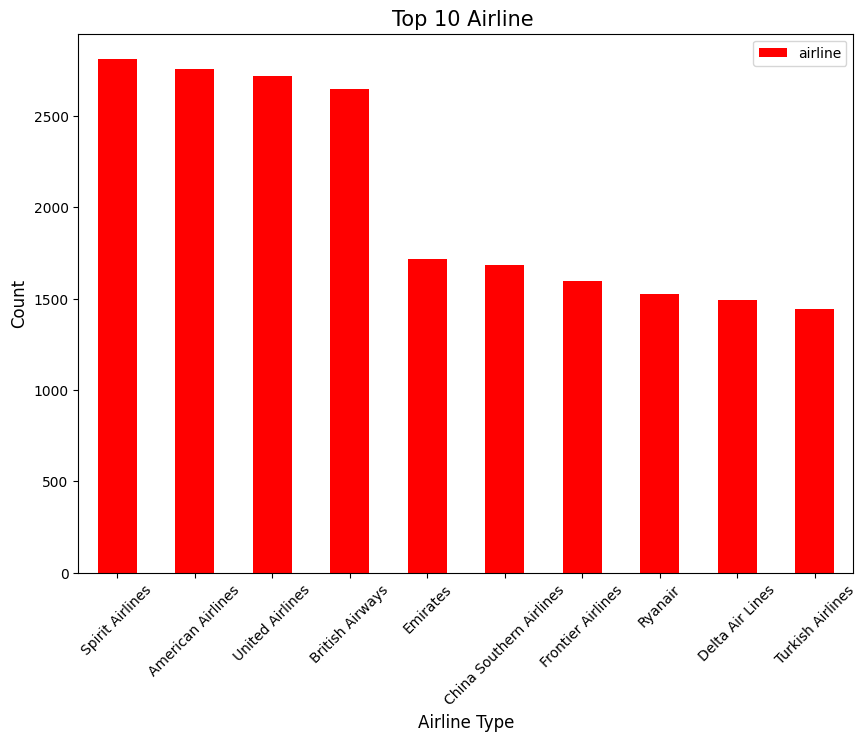

In [ ]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
tba[:10].plot(kind='bar',color = 'red')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation=45)
plt.show()

**We have observed that the top 10 airlines with most trips are-**

* Spirit Airlines

* American Airlines

* United Airlines

* British Airways

* Emirates

* China southern airline

* Frontier airlines

* Ryanair

* Delta air lines

* Turkish airlines

#### Chart - 10 **Comparison of all independent features**

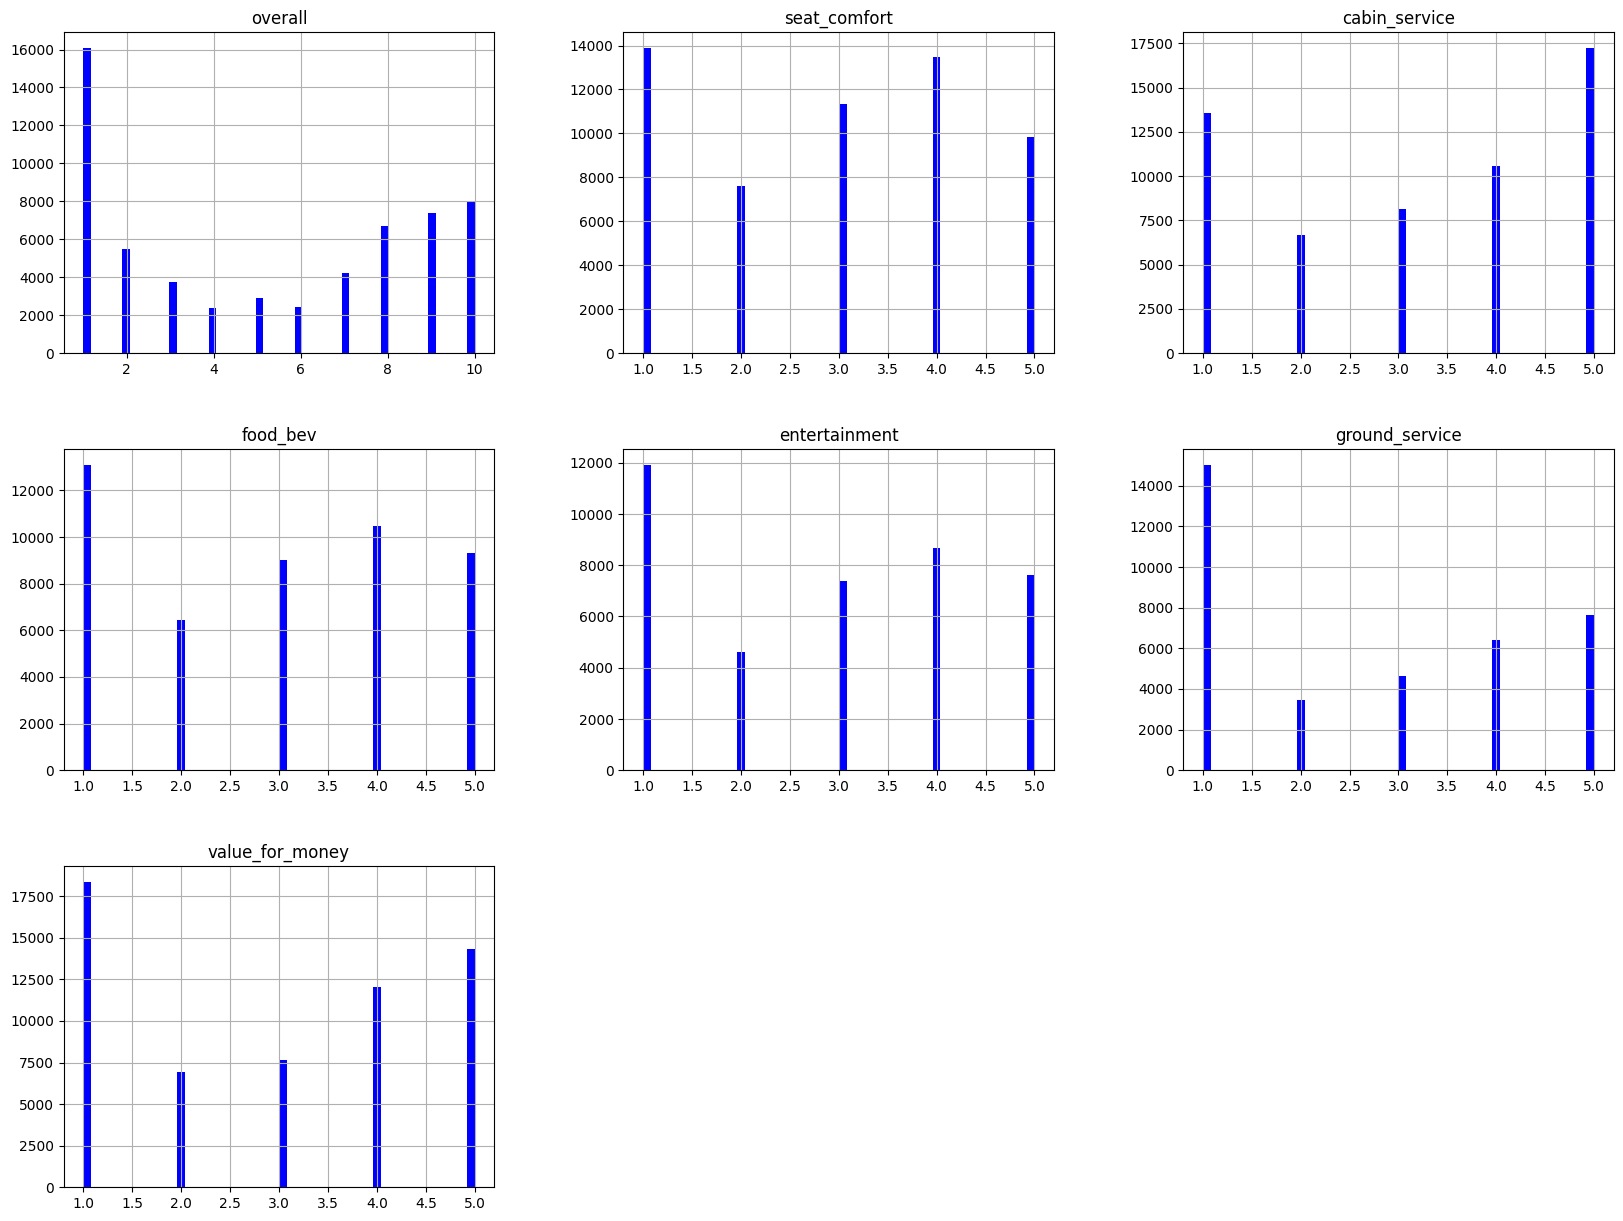

In [ ]:
# Chart - 10 visualization code
#frequency distribution using histgram
new_df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

**From above plot, we conclude that**

* The overall feature ratings of 1 to 2 occur more frequently.
From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

* From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

* The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

* The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

* From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

#### Chart - 11 **Correlation Heatmap**

<Axes: >

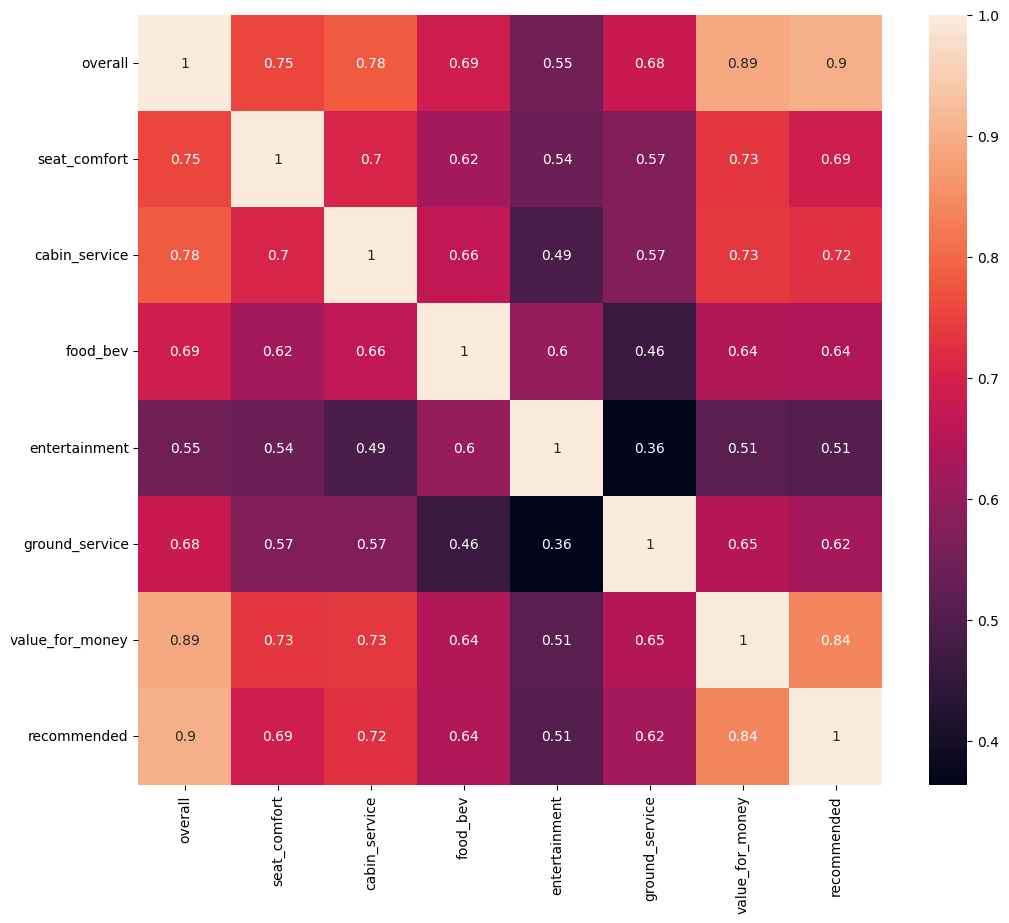

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True)

#### Chart - 12 **Pairplot**

<Figure size 1200x800 with 0 Axes>

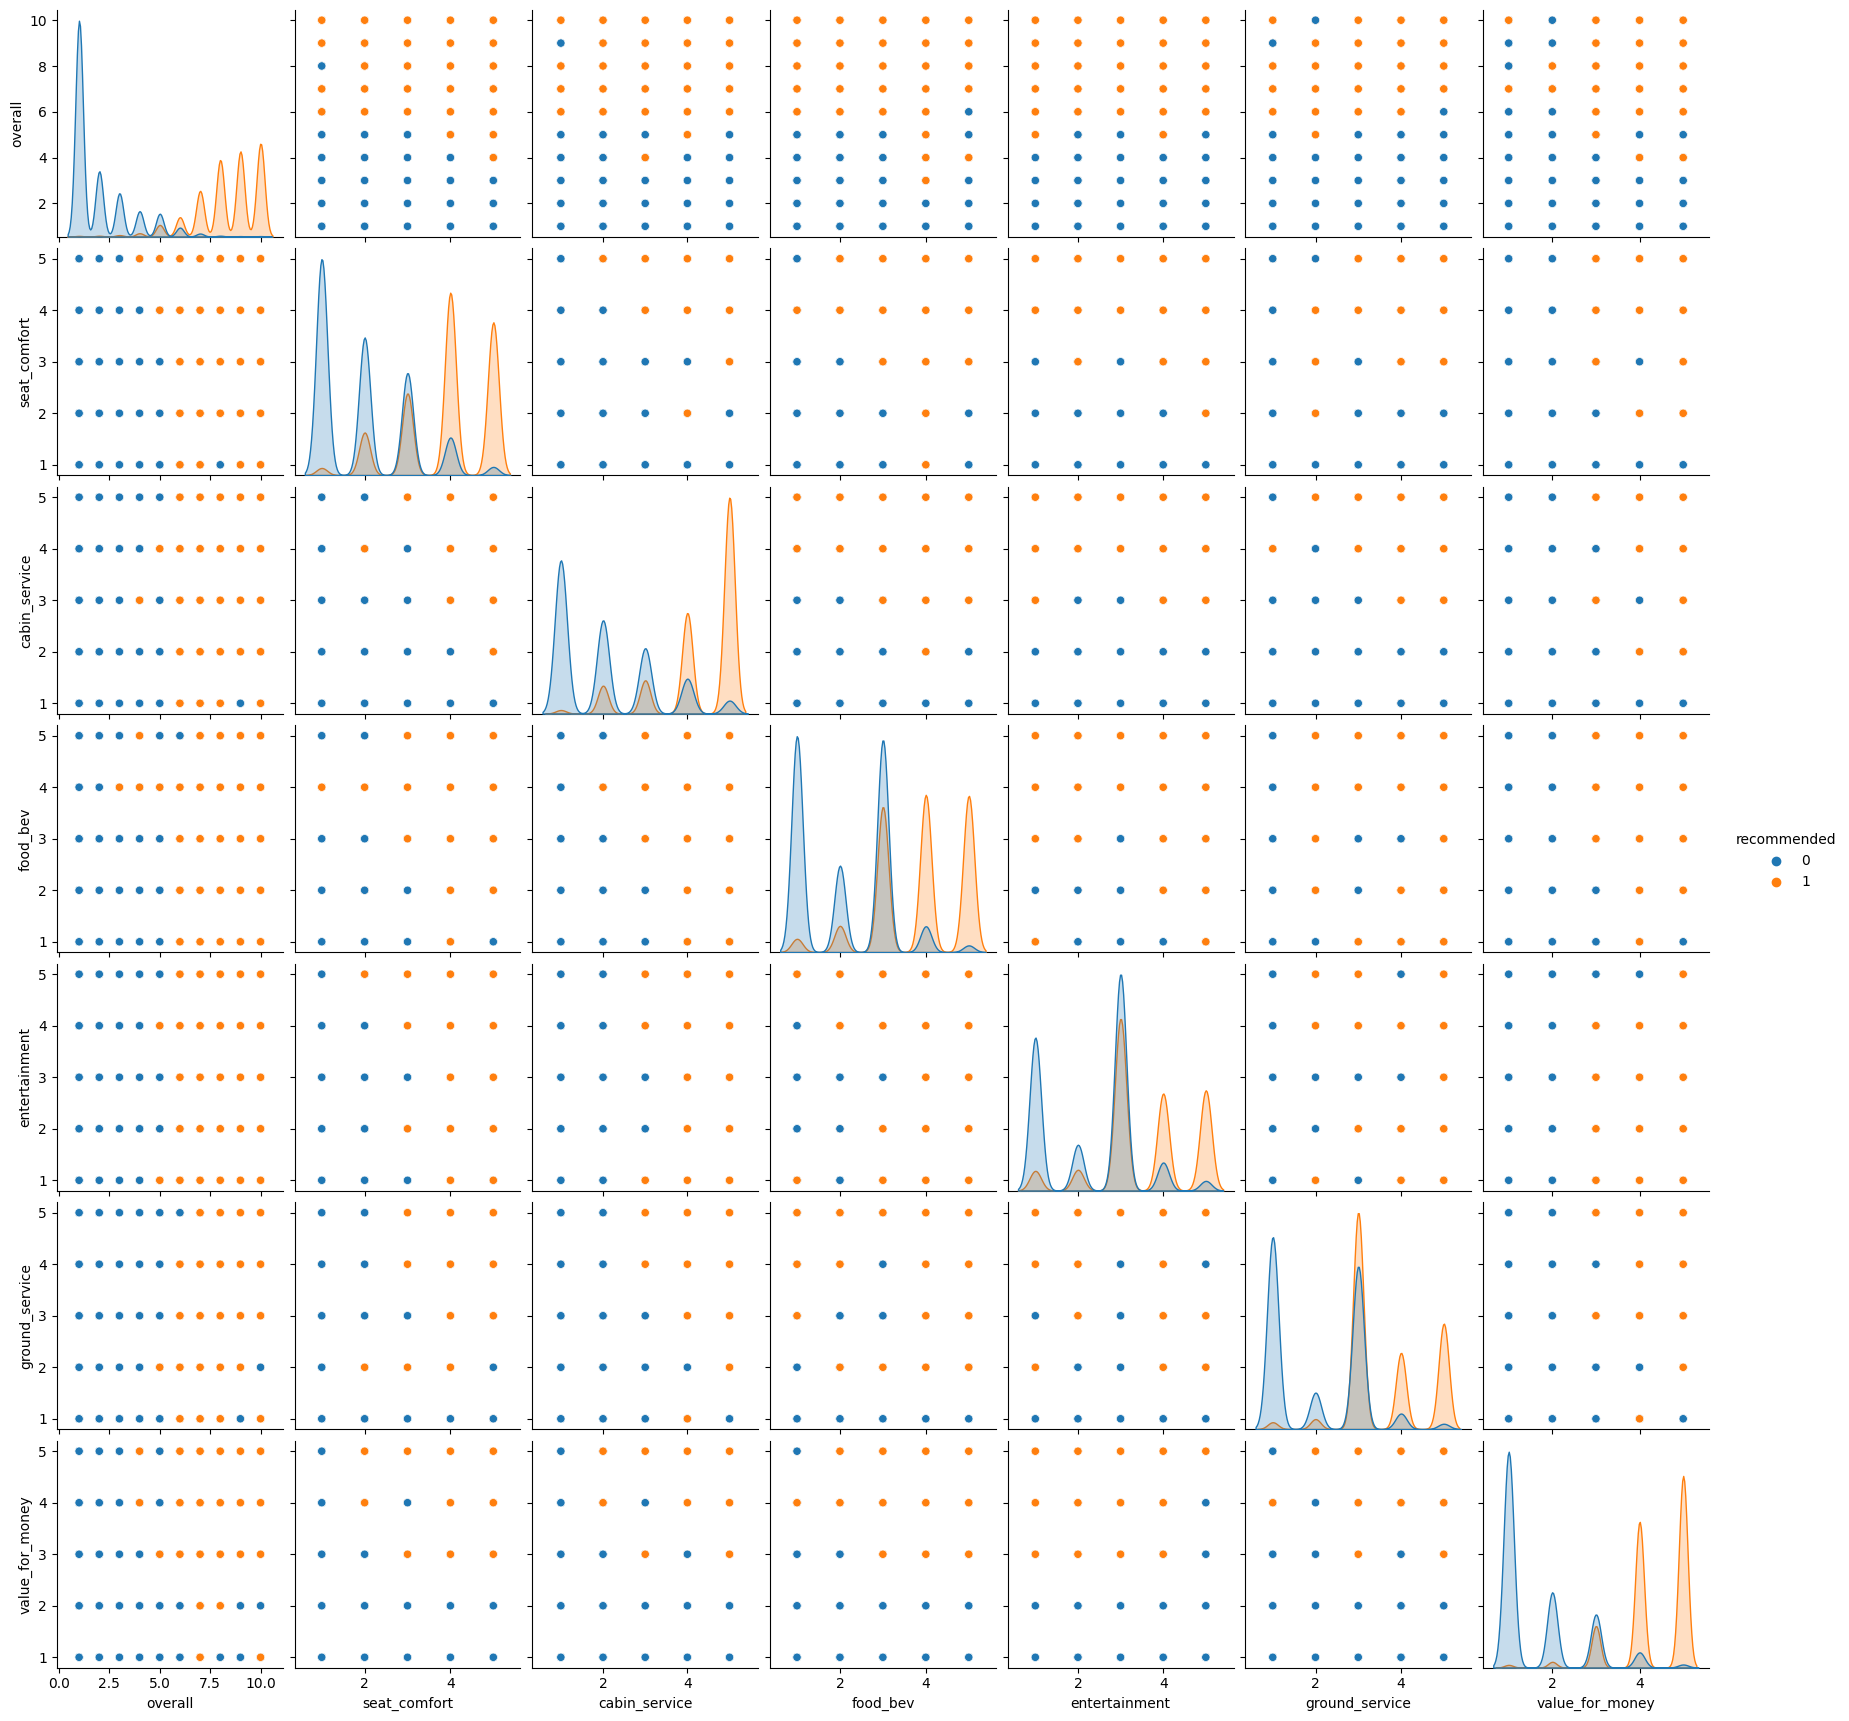

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(12,8))
sns.pairplot(data = airline_df, hue='recommended')

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

**Solo leisure traveller_type are more likely to give more positive recommendations than business traveller_type.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0)**: Both traveller_type are equally likely to give recommendation.
* **Alternate Hypothesis (H1)**: Solo leisure traveller_type are more likely to give more positive recommendations.

#### 2. Perform an appropriate statistical test.

In [ ]:
traveller_type_count = dict(airline_df['traveller_type'].value_counts())
traveller_type_count

{'Solo Leisure': 23955,
 'Couple Leisure': 15573,
 'Business': 10348,
 'Family Leisure': 9885}

In [ ]:
# Perform Statistical Test to obtain P-Value
# Subset the data for Solo_leisure and Business traveller_type recommendations.

solo_leisure_refrral = airline_df[airline_df['traveller_type'] == 'Solo Leisure']['recommended'].sum()
business_refrral = airline_df[airline_df['traveller_type'] == 'Business']['recommended'].sum()

# Calculate the means and standard deviations
mean_solo_leisure_refrral = np.mean(solo_leisure_refrral)
mean_business_refrral = np.mean(business_refrral)
std_solo_leisure_refrral = np.std(solo_leisure_refrral)
std_business_refrral = np.std(business_refrral)
n_solo_leisure_refrral = traveller_type_count['Solo Leisure']
n_business_refrral = traveller_type_count['Business']

# Perform Z-test for comparing means
z_score = (mean_solo_leisure_refrral - mean_business_refrral) / np.sqrt((std_solo_leisure_refrral**2 / n_solo_leisure_refrral) + (std_business_refrral**2 / n_business_refrral))
p_value = 1 - stats.norm.cdf(z_score)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print results
print("Hypothesis 1:Solo leisure traveller_type are more likely to give more positive recommendations.")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)



Hypothesis 1:Solo leisure traveller_type are more likely to give more positive recommendations.
Z-score: inf
P-value: 0.0
Reject the null hypothesis


### Hypothetical Statement - 2

**Good Overall Ratings result in positive recommendation.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0) :** Overall Ratings parameter has no affect on recommendation.
* **Alternate Hypothesis (H1) :** Good average overall ratings result in positive recommendation.

#### 2. Perform an appropriate statistical test.

In [ ]:
positive_rating = [6,7,8,9,10]
negative_rating = [1,2,3,4,5]

In [ ]:
# Perform Statistical Test to obtain P-Value
# Subset the data for Solo_leisure and Business traveller_type recommendations.

positive_overall_rating = airline_df[airline_df['overall'].isin(positive_rating)]['recommended'].sum()
negative_overall_rating = airline_df[airline_df['overall'].isin(negative_rating)]['recommended'].sum()

# Calculate the means and standard deviations
mean_positive_overall_rating= np.mean(positive_overall_rating)
mean_negative_overall_rating = np.mean(negative_overall_rating)
std_positive_overall_rating = np.std(positive_overall_rating)
std_negative_overall_rating = np.std(negative_overall_rating)
n_overall_rating = len(airline_df['overall'])


# Perform Z-test for comparing means
z_score = (mean_positive_overall_rating - mean_negative_overall_rating) / np.sqrt((std_positive_overall_rating**2 / n_overall_rating) + (std_negative_overall_rating**2 / n_overall_rating))
p_value = 1 - stats.norm.cdf(z_score)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print results
print("Hypothesis 1: Good average overall ratings result in positive recommendation..")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)

Hypothesis 1: Good average overall ratings result in positive recommendation..
Z-score: inf
P-value: 0.0
Reject the null hypothesis


### Hypothetical Statement - 3

**Business Class gives more recommendation than Economy class**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0) :** There's equal distribution for all cabin types.
* **Alternate Hypothesis (H1) :** Business Class gives more recommendation than Economy class.

#### 2. Perform an appropriate statistical test.

In [ ]:
cabin_dict = dict(airline_df['cabin'].value_counts())
cabin_dict

{'Economy Class': 46227,
 'Business Class': 9590,
 'Premium Economy': 2412,
 'First Class': 1532}

In [ ]:
# Perform Statistical Test to obtain P-Value
# Subset the data for Solo_leisure and Business traveller_type recommendations.

economy_cabin = airline_df[airline_df['cabin'] == 'Economy Class']['recommended'].sum()
business_cabin = airline_df[airline_df['cabin'] == 'Business Class']['recommended'].sum()

# Calculate the means and standard deviations
mean_economy_cabin_rating= np.mean(economy_cabin)
mean_business_cabin_rating = np.mean(business_cabin)
std_economy_cabin_rating = np.std(economy_cabin)
std_business_cabin_rating = np.std(business_cabin)
n_economy_cabin = cabin_dict['Economy Class']
n_business_cabin = cabin_dict['Business Class']

# Perform Z-test for comparing means
z_score = (mean_economy_cabin_rating - mean_business_cabin_rating) / np.sqrt((std_economy_cabin_rating**2 / n_economy_cabin) + (std_business_cabin_rating**2 / n_business_cabin))
p_value = 1 - stats.norm.cdf(z_score)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print results
print("Hypothesis 3: Business Class gives more recommendation than Economy class.")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)

Hypothesis 3: Business Class gives more recommendation than Economy class.
Z-score: inf
P-value: 0.0
Reject the null hypothesis


## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

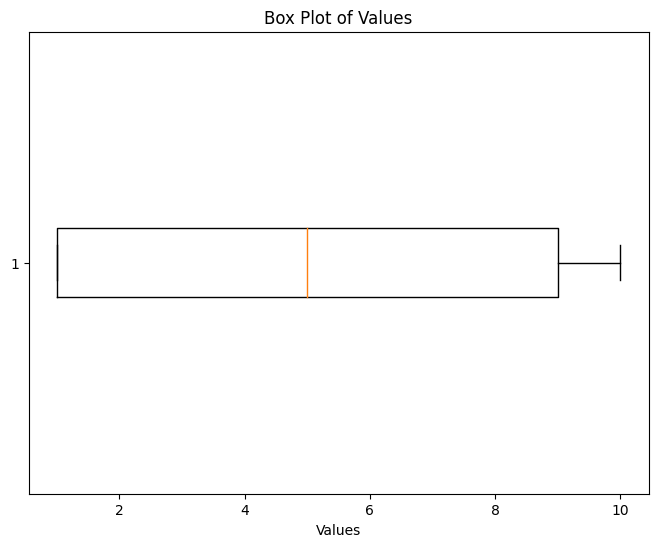

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(8, 6))
plt.boxplot(airline_df['overall'], vert=False)  # Set vert=False for horizontal box plot
plt.title("Box Plot of Values")
plt.xlabel("Values")
plt.show()

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
airline_df_dummies = pd.get_dummies(airline_df)
airline_df_dummies.head(3)

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,airline_ANA All Nippon Airways,airline_Adria Airways,...,airline_easyJet,airline_flydubai,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

**I have used One Hot Encoding method to get dummies for Categorical variables like StoreType, Assortments etc. get_dummies is a method provided by the pandas library in Python, which is commonly used for converting categorical variables into a set of binary dummy/indicator variables. This process is known as one-hot encoding.**

### 4. Removing Multicollinearity

In [ ]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])


,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [ ]:
#drop overall column
airline_df.drop(["overall"], axis = 1, inplace = True)

In [ ]:
# dropping airline column as its no longer required
airline_df.drop(["airline"], axis = 1, inplace = True)

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation and Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#separating the dependent and independent variables
y = airline_df['recommended']
X = airline_df.drop(columns = 'recommended')

In [ ]:
X.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

In [ ]:
X = pd.get_dummies(X)
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


In [ ]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['seat_comfort','cabin_service','value_for_money']]])

,variables,VIF
0,food_bev,10.831734
1,entertainment,8.984398
2,ground_service,6.889056
3,recommended,3.349061


### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#train and test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42)

In [ ]:
#shape of x_train and x_test data
print(X_train.shape)
print(X_test.shape)

(47808, 14)
(11953, 14)


In [ ]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


### 7. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## ***7. ML Model Implementation***

# ML Model - 1 **Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
#logistic regression fitting
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.coef_

array([[ 0.41625547,  0.85099813,  0.58103014,  0.30787119,  0.92432576,
         2.60029503,  0.05388184, -0.02563545, -0.06240293,  0.02856392,
         0.05080192, -0.03192381,  0.01657848, -0.04014623]])

In [ ]:
log_reg.intercept_

array([-0.46490763])

In [ ]:
log_reg.score(X_test,y_test)

0.9324019074709278

In [ ]:
# Predict on the model

y_pred = log_reg.predict(X_test)

In [ ]:
#report of logistic regression

report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



<Axes: >

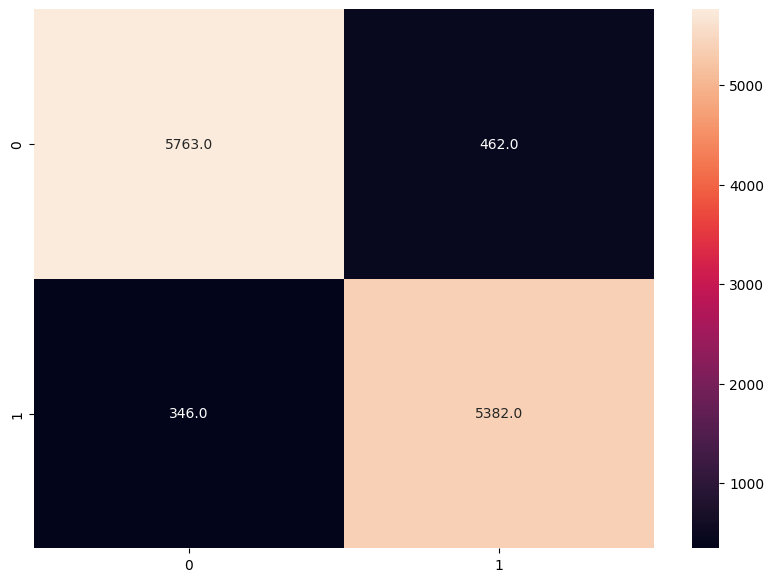

In [ ]:
#cofusion matrix of logistic regression
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#ploting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93495085
 0.94080736 0.94143485 0.93284519 0.93702929]


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

logistic = LogisticRegression()

# Define the hyperparameter search space
param_dist = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic, param_distributions=param_dist, n_iter=100,
    cv=5, scoring='accuracy', random_state=42
)
# Fit the Algorithm

random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:")
print(random_search.best_params_)


Best hyperparameters:
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 400, 'C': 0.004832930238571752}


In [ ]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.9334058395381912


# ML Model - 2 **Decision Tree Classifier**

In [ ]:
# ML Model - 2 Implementation

#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()

# Fit the Algorithm
tree_classify.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(X_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(X_test,y_test))

Training Accuracy of Decision Tree Model is 0.9745440093708166
Testing Accuracy of Decision Tree Model is 0.917928553501213


In [ ]:
# Predict on the model
y_pred = tree_classify.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#report of decision tree

report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [ ]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [ ]:
#calling an best score
tree_cv.best_score_

0.9371652656843548

# ML Model - 3 **Random Forest Classifier**

In [ ]:
# ML Model - 3 Implementation

random_forest = RandomForestClassifier()

# Fit the model
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
random_forest.score(X_test,y_test)

0.9288044842299005

In [ ]:
#report of decision tree
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)


In [ ]:
random_forest_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [ ]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

# ML Model - 4 **K-Nearest Neighbours**

In [ ]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = k_neighbor.predict(X_test)

In [ ]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(X_train, y_train)
print('Train Accuracy : ',train_accuracy)

# Compute accuracy on the test set
test_accuracy = k_neighbor.score(X_test, y_test)
print('Test Accuracy : ',test_accuracy)

Train Accuracy :  0.9489834337349398
Test Accuracy :  0.9309796703756379


In [ ]:
#coNfusion matrix of k_neighbor
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

array([[5798,  427],
       [ 398, 5330]])

In [ ]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.930961191133248

# Model 5 **Support Vector Machine**

In [ ]:
support_vector = SVC(kernel='linear')
support_vector.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#score for support vector machine
support_vector.score(X_test, y_test)

0.9319836024429013

In [ ]:
y_pred = support_vector.predict(X_test)

In [ ]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[5746,  479],
       [ 334, 5394]])

<Axes: >

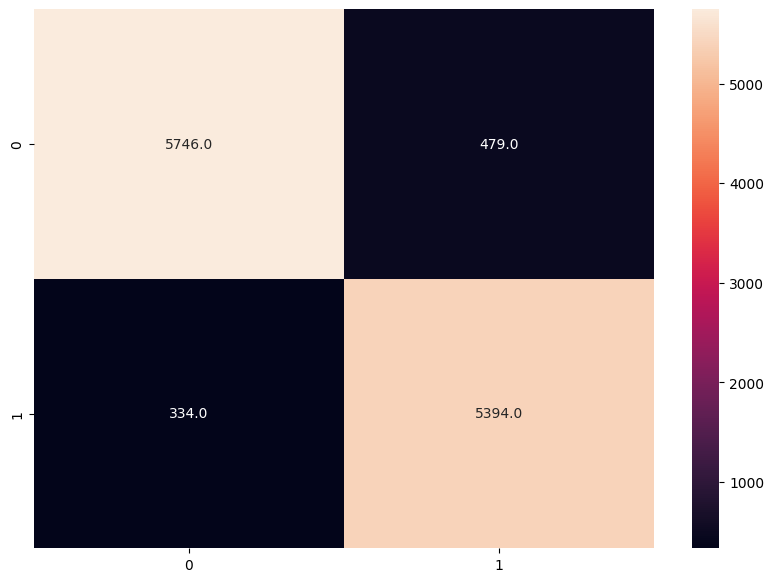

In [ ]:
#ploting confusion matrix
sns.heatmap(support_vector_con_mat, annot=True, fmt = ".1f")

# Model 6 **Naive Bayes Classifier**

In [ ]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
#score for naive bayes
naive_bayes.score(X_train,y_train)

0.9177543507362784

In [ ]:
# making predictions on the testing set
y_pred = naive_bayes.predict(X_test)

In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.0901029030369


## **Accuracy Matrix for all Fitted Models**

In [ ]:
#Creating a function to return all Models Accuracy Score

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)

  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

   # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics

In [ ]:
models=[log_reg,tree_cv,random_forest,k_neighbor,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector','naive bayes']

In [ ]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],X_train,X_test)
  print("-----"*3+f"{name[model_]}"+"-----"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

---------------Logistic Regression Model--------------------

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938985    0.932402
1  Precsion_Score     0.928165    0.920945
2    Recall_Score     0.945003    0.939595
3   Roc_Auc_Score     0.939259    0.932689

---------------Decision Tree Model After Hyperparameter Tuning--------------------

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.940972    0.933071
1  Precsion_Score     0.934318    0.926445
2    Recall_Score     0.942280    0.934532
3   Roc_Auc_Score     0.941032    0.933130

---------------Random Forest Model After Hyperparameter Tuning--------------------

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.928804
1  Precsion_Score     0.970686    0.924013
2    Recall_Score     0.976016    0.927723
3   Roc_Auc_Score     0.974611    0.928761

---------------k_neighbor--------------------

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.948983  

# **Conclusion**

The Models used for this Classsification problem are

1. Logistic Regression Model
2. Decision Tree Model
3. Random Forest Model
4. K-Nearest Neighbor Model
5. Support Vector Machine Model
6. Naive Bayes

* We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

* Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given first priority , Accuracy is given second priority , and ROC AUC is given third priority.

* We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.* We can conclude that LogisticRegression gives the best model.

* model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

* The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

* The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

* As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***